<a href="https://colab.research.google.com/github/seefa1428/PRODIGY_DS/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ID         Game Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


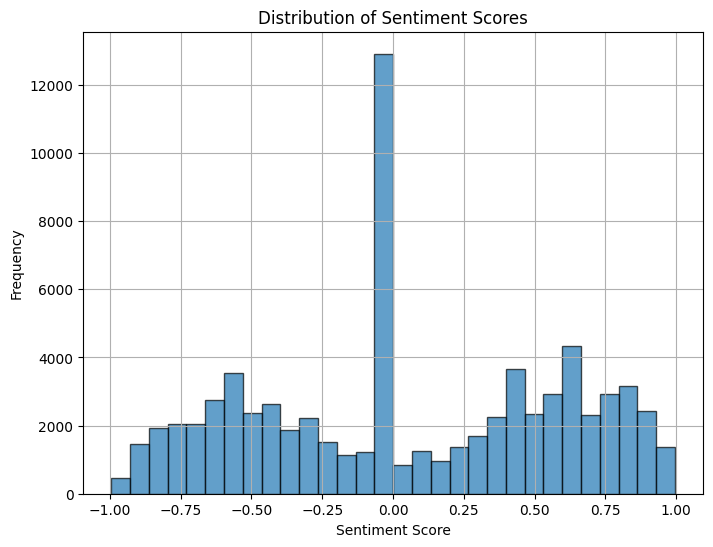

count    73996.000000
mean         0.063346
std          0.536903
min         -0.994800
25%         -0.401900
50%          0.000000
75%          0.568800
max          0.995300
Name: sentiment_score, dtype: float64


In [14]:
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'twitter_training.csv'
df = pd.read_csv(file_path, header=None, names=['ID', 'Game', 'Sentiment', 'Text'])

# Drop rows with NaN values in 'Text' column, if any
df = df.dropna(subset=['Text'])

# Display the first few rows to understand the structure
print(df.head())

# Function to preprocess text data
def preprocess_text(text):
    # Ensure text is a string
    if isinstance(text, str):
        # Remove special characters, URLs, and numbers
        text = re.sub(r'http\S+|www\S+|\d+', '', text)
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        return text
    else:
        return ''  # Return empty string for non-string objects

# Apply preprocessing to the 'Text' column
df['clean_text'] = df['Text'].apply(preprocess_text)

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores using VADER
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

# Apply sentiment analysis to each cleaned tweet
df['sentiment_score'] = df['clean_text'].apply(get_sentiment_score)

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment_score'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.grid(True)
plt.show()

# Print summary statistics
print(df['sentiment_score'].describe())
